# Setup

In [34]:
# data wrangling
import pandas as pd

# top2vec
from top2vec import Top2Vec

# data visualisation
import matplotlib.pyplot as plt

# set seed
import random
random.seed(400)

In [2]:
# import data
df = pd.read_excel("output/obama_speeches.xlsx", index_col = 0)

In [3]:
speeches_list = df['speech'].tolist()

# Top2Vec

In [35]:
# train top2vec model
model = Top2Vec(speeches_list)

2022-05-31 09:43:43,018 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-05-31 09:43:47,491 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-31 09:46:53,097 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-05-31 09:46:57,849 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-05-31 09:46:57,866 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [46]:
# print the number of speeches most similar to each topic
topic_sizes = model.get_topic_sizes()
print(topic_sizes)

(array([125,  90,  88,  66,  37,  30], dtype=int64), array([0, 1, 2, 3, 4, 5], dtype=int64))


In [47]:
# get topic parameters
topic_words, word_scores, topic_nums = model.get_topics()

In [48]:
# assign names to topics
topic_names = ['injustice', 'international affairs', 'economy', 'terroism', 'Iraq-Afghanistan conflict', 'healthcare']

In [50]:
# print topics and associated keywords
for words, scores, topic in zip(topic_words, word_scores, topic_names):
    print(f"topic: {topic}")
    print(f"keywords: {words}\n")

topic: injustice
keywords: ['love' 'king' 'god' 'dr' 'life' 'black' 'church' 'man' 'hearts' 'honor'
 'memorial' 'loved' 'grace' 'courage' 'moments' 'lived' 'his' 'memory'
 'tells' 'martin' 'faith' 'quiet' 'men' 'justice' 'marched' 'patriots'
 'day' 'evil' 'words' 'names' 'prayer' 'march' 'forever' 'lincoln'
 'stories' 'died' 'he' 'comfort' 'parks' 'creed' 'gather' 'hatred' 'bless'
 'prayers' 'tragedy' 'family' 'grief' 'heart' 'story' 'slavery']

topic: international affairs
keywords: ['nations' 'human' 'peoples' 'world' 'dignity' 'governments' 'societies'
 'economies' 'democracy' 'countries' 'peace' 'conflict' 'freedom' 'must'
 'americas' 'peaceful' 'europe' 'democracies' 'prosperity' 'global'
 'society' 'beings' 'progress' 'development' 'united' 'globe' 'live'
 'indonesia' 'peacefully' 'aspirations' 'continent' 'international' 'seek'
 'path' 'citizens' 'africa' 'prosperous' 'poverty' 'partnership' 'stand'
 'region' 'free' 'conflicts' 'between' 'upon' 'corruption' 'india'
 'engagement'

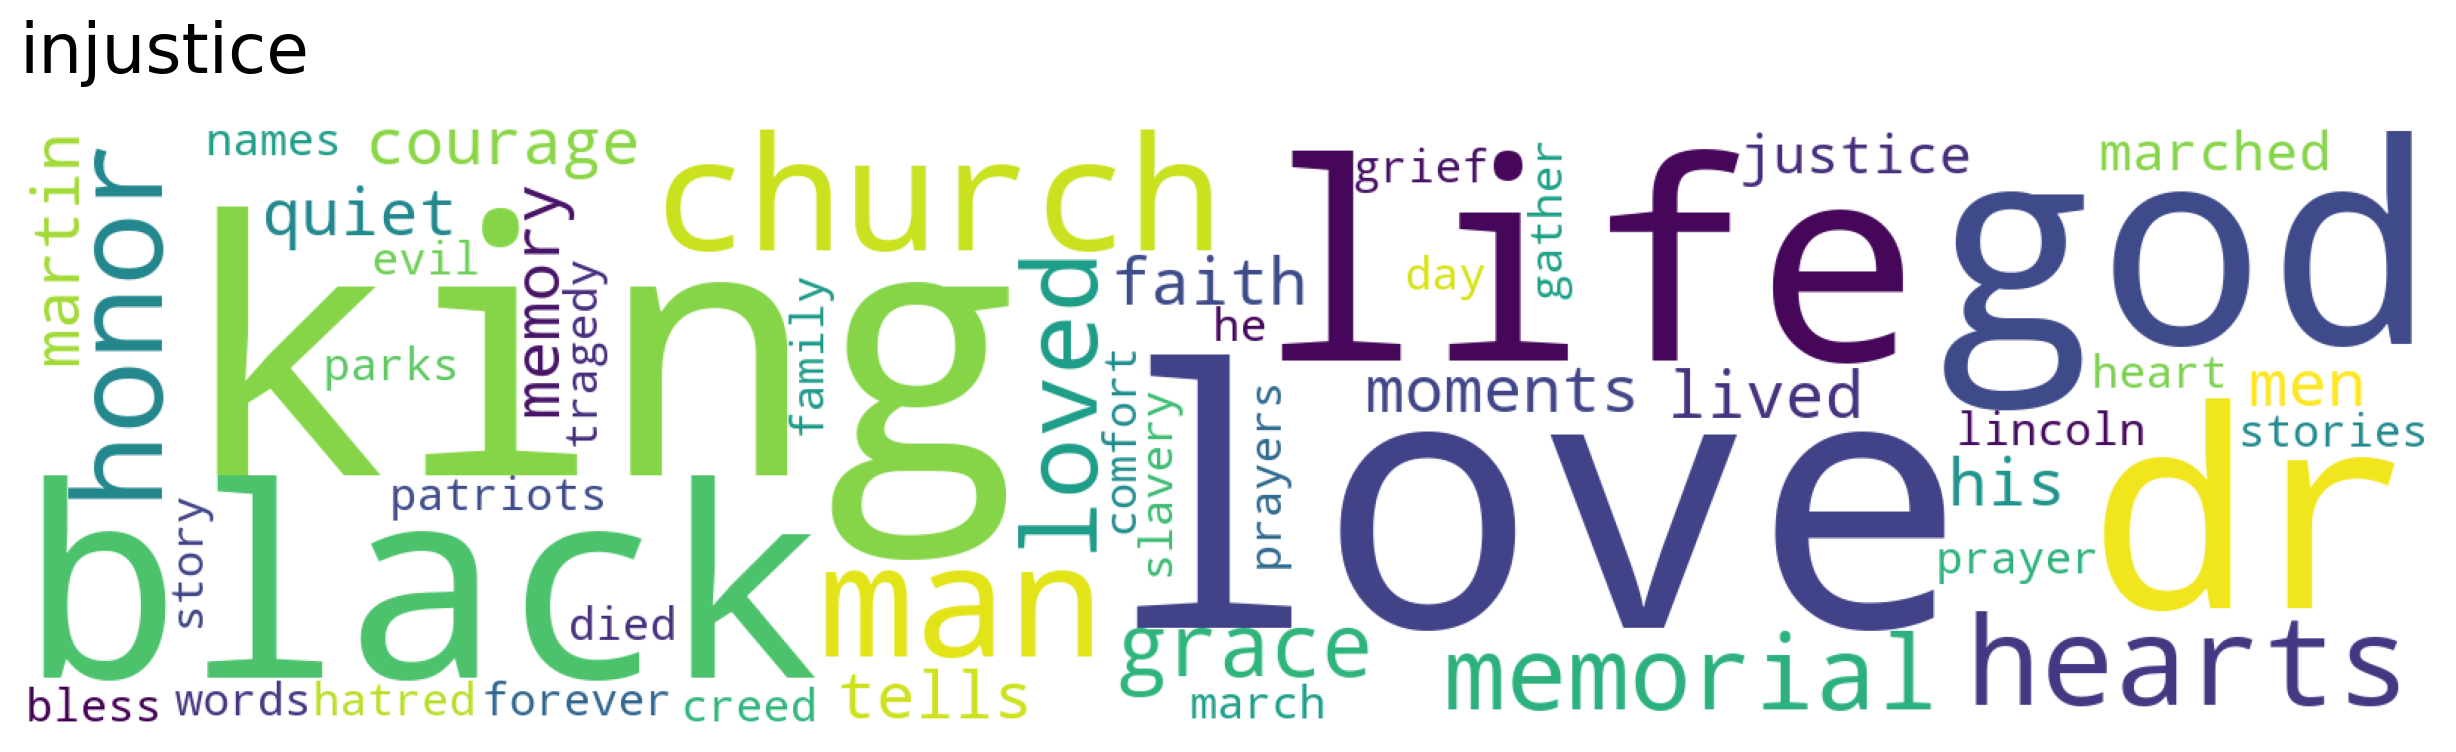

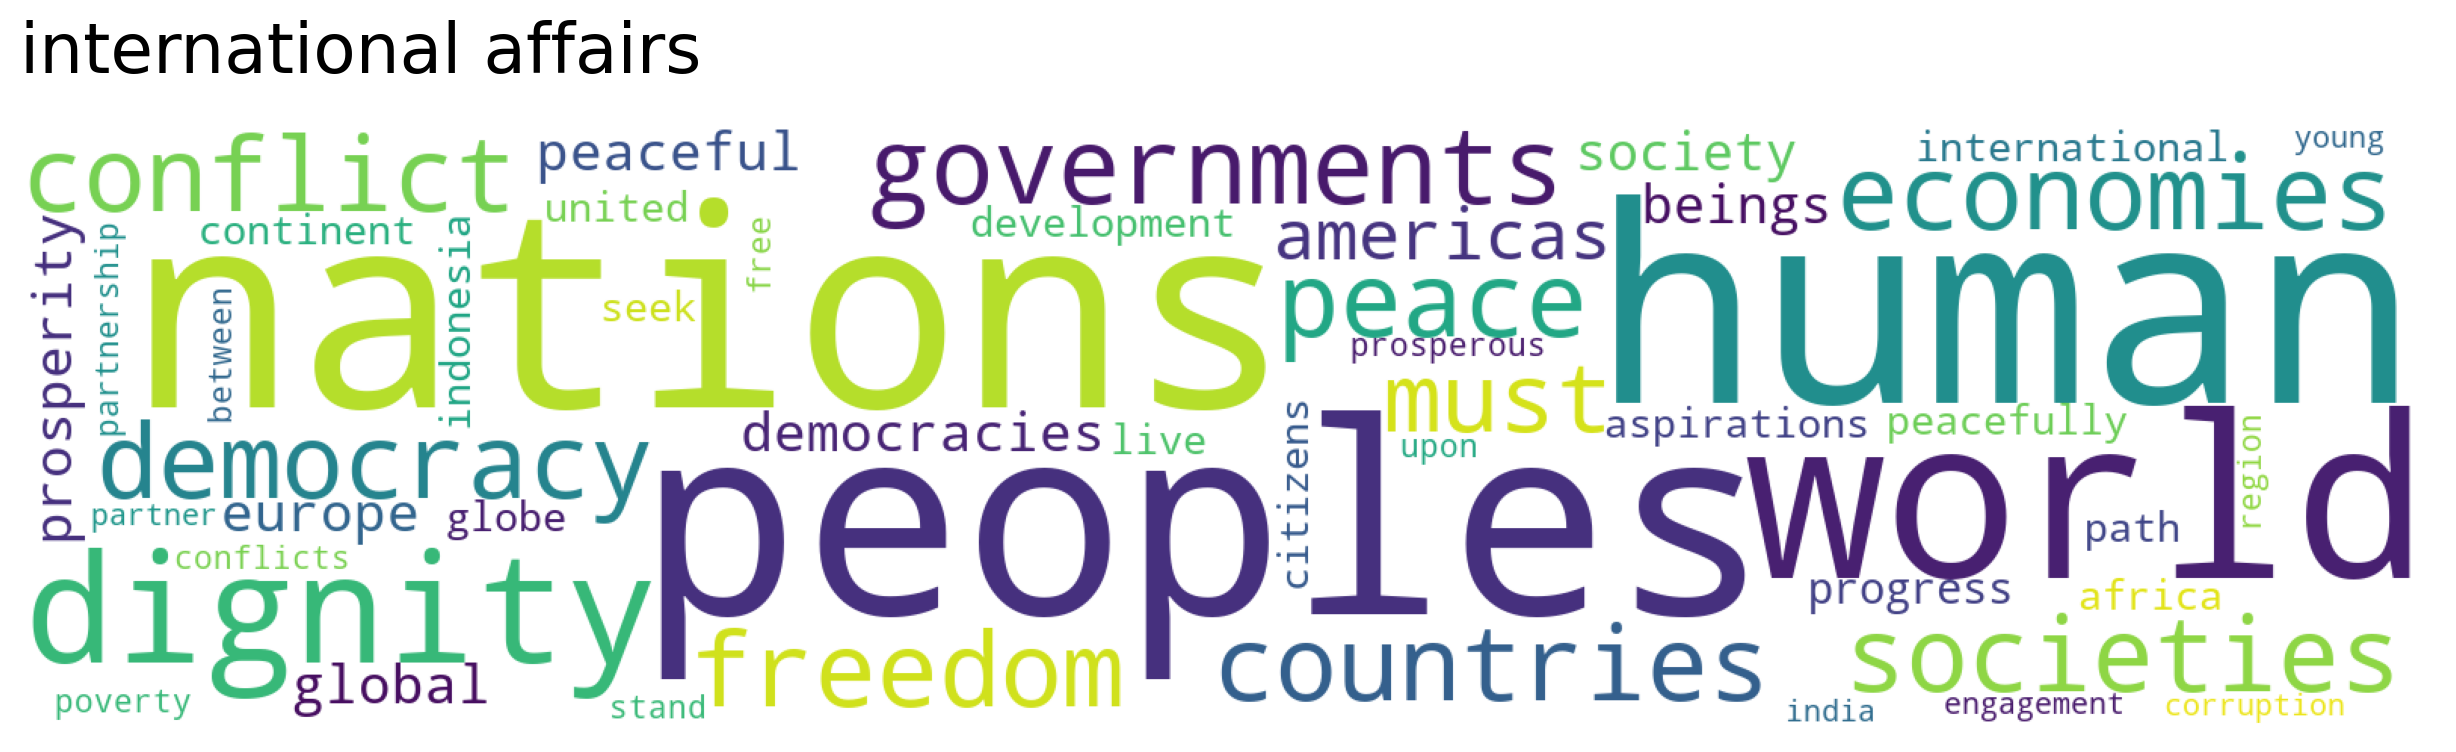

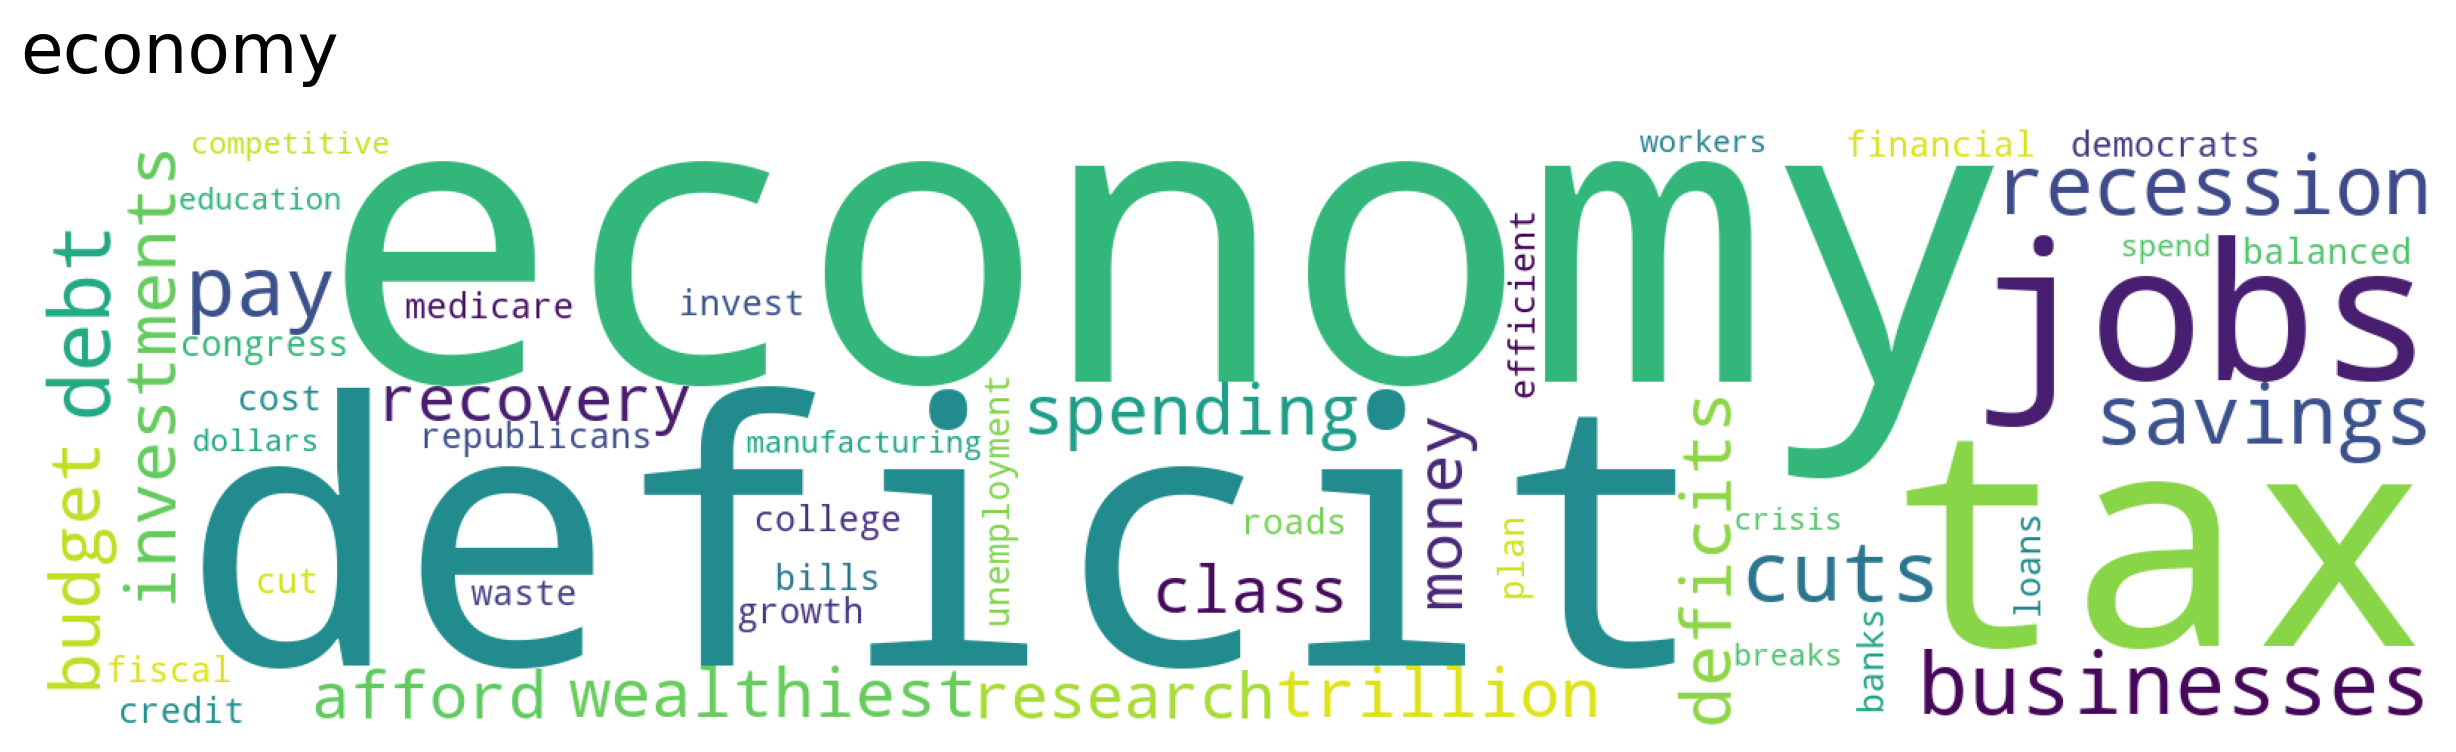

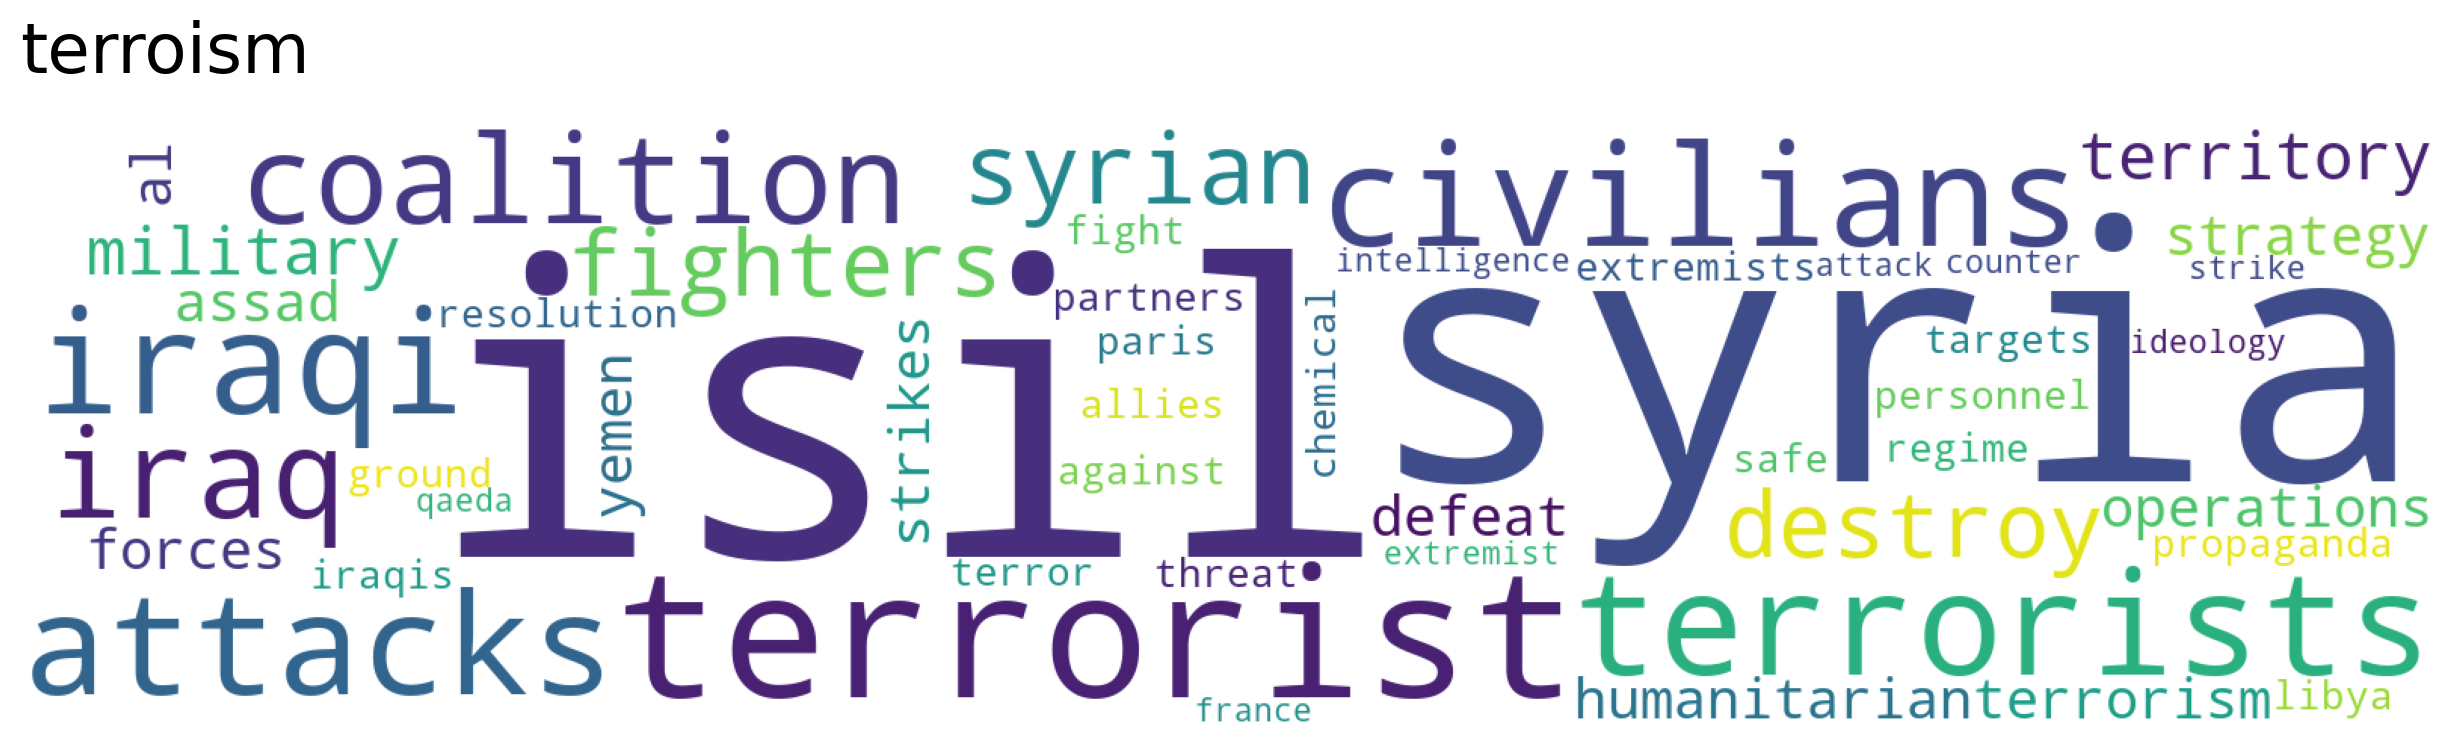

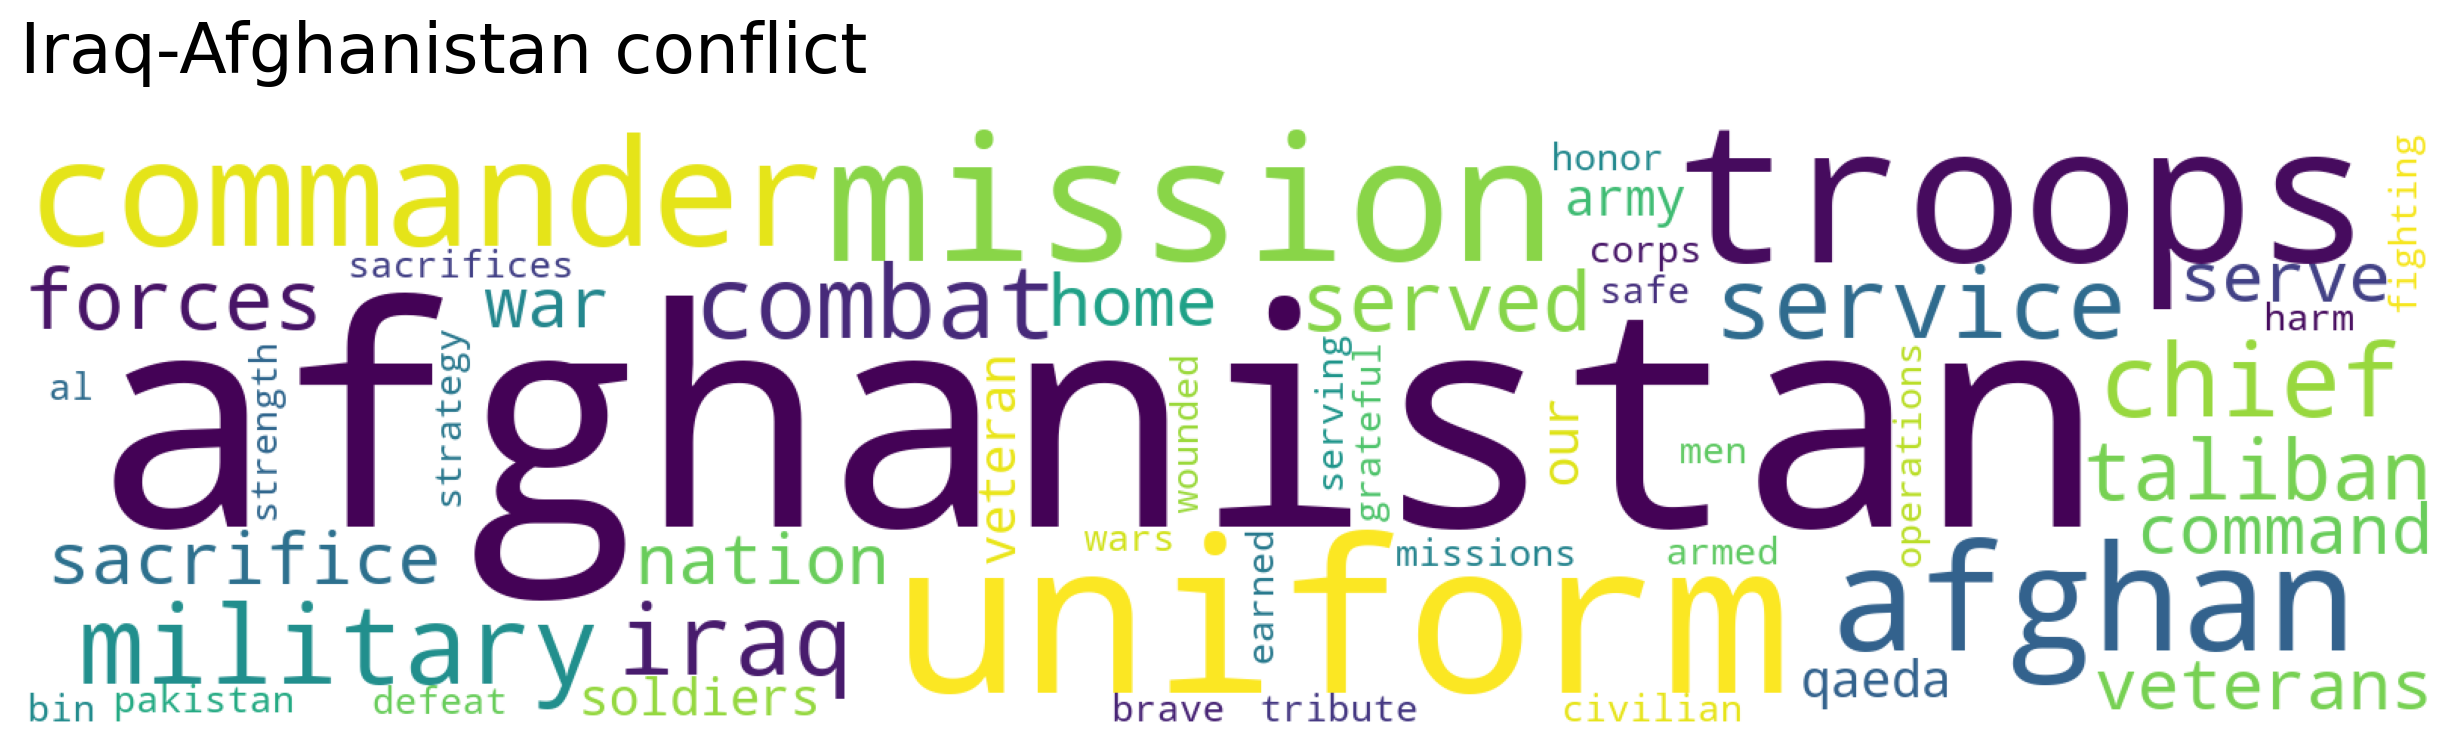

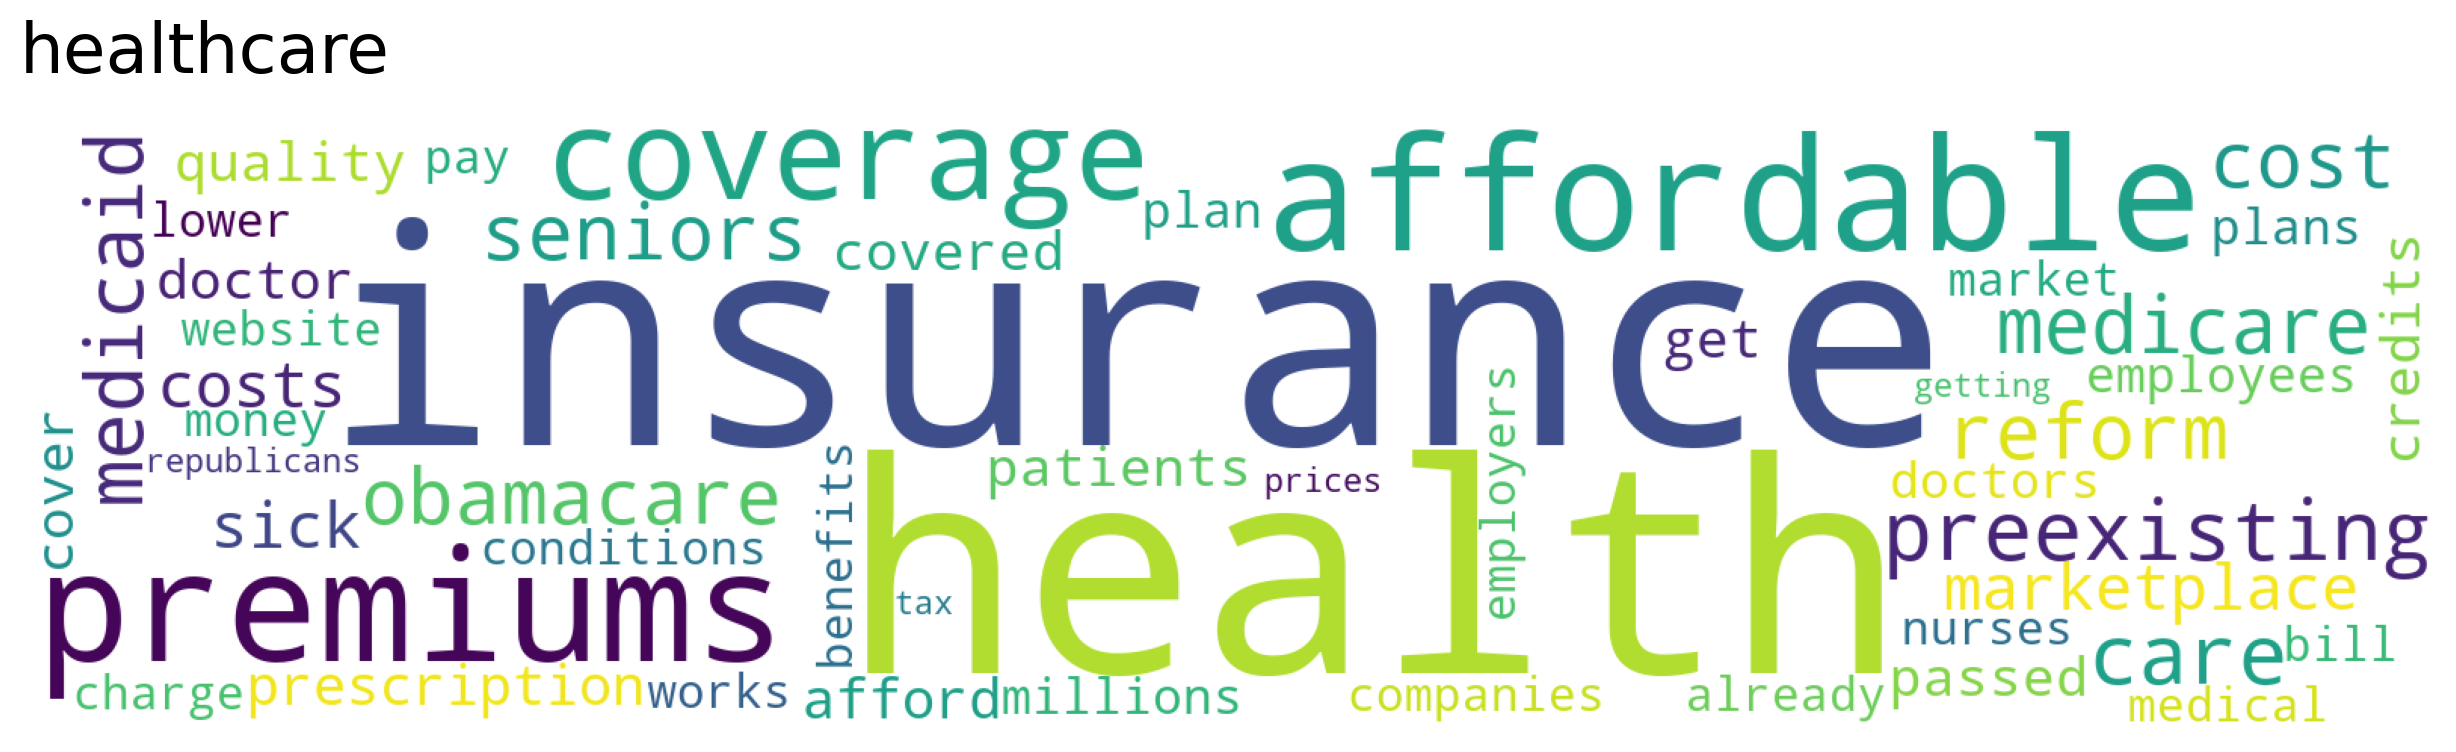

In [53]:
# generate word clouds
i = 0
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color = "white")
    plt.title(topic_names[i], loc = "left", fontsize = 25, pad = 20)
    plt.show()
    print("\n")
    i = i + 1